<a href="https://colab.research.google.com/github/DhritiNirmal/EXL-EQ/blob/main/EXL%20eq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXL EQ CASE- TERM DEPOSIT LEAD PREDICTION

In [ ]:
#Import Necessary Packages 

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt 
import seaborn as sns
!pip install category_encoders
import category_encoders as ce

     |████████████████████████████████| 86 kB 3.8 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Reading the excel files
dictionary=pd.read_excel("Data_Dictionary.xlsx")
exl=pd.read_excel("Historical_data.xlsx")

In [ ]:
#load the dataset
dictionary

,column,description
0,customer_id,unique identifier for each customer (primary key)
1,customer_age,age of the customer
2,job_type,type of job
3,marital,marital status
4,education,highest educational qualification
5,default,delinquency status
6,balance,current account balance
7,housing_loan,flag indicating customers with home loan
8,personal_loan,flag indicating customers with personal loan
9,communication_type,mode of communication of the previous campaign


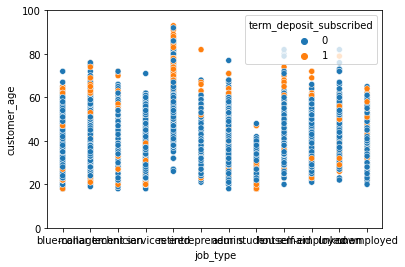

In [ ]:
#Trying to examine the relation between Customer age, Job type and Term Deposit Subscribed
sns.scatterplot(y="customer_age",x="job_type",hue="term_deposit_subscribed", data=exl)
plt.ylim(0,100)
plt.show()

As we can see we can't find any significant relation between the Variables

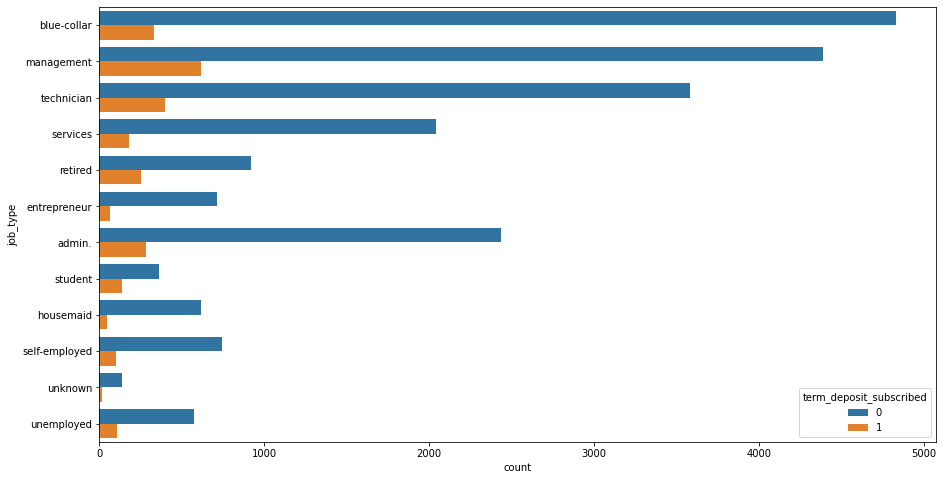

In [ ]:
#Now trying to find relation between Job type and Term Deposit Subscribed
plt.figure(figsize=(15,8))
sns.countplot(y="job_type",hue ='term_deposit_subscribed', data=exl)
plt.show()

we can see people who fall under the 'Management' job type have subscribed the most whereas who fall under 'Blue Collar' category have the highest number of non-subscribed people.

In [ ]:
#Trying to count the number of people who have taken a housing loan
exl.housing_loan.value_counts()

yes    13369
no     10511
Name: housing_loan, dtype: int64

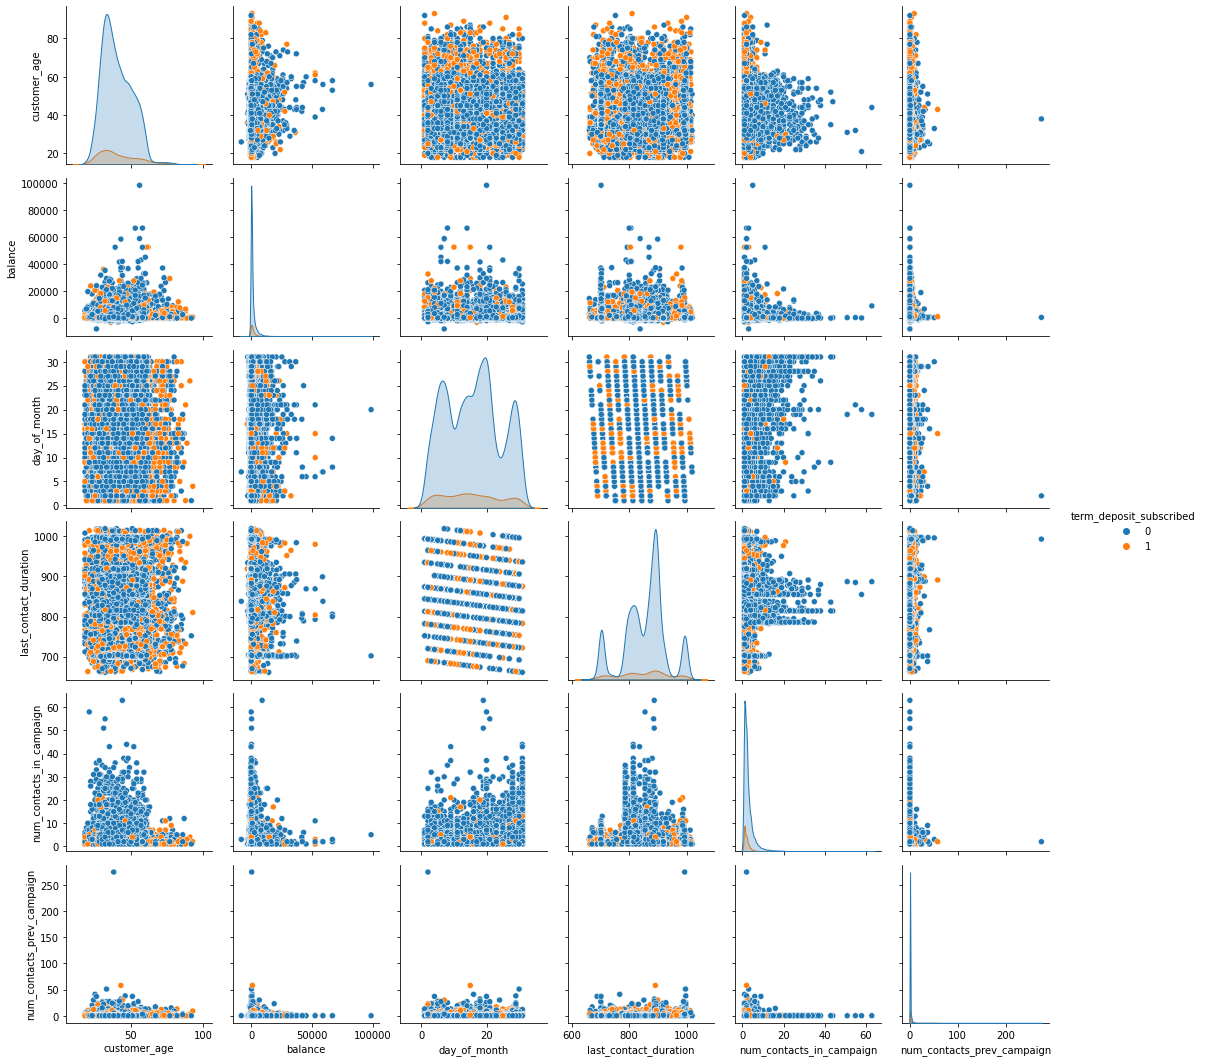

In [ ]:
# PaierPlot the Numerical Variable
sns.pairplot(exl,hue="term_deposit_subscribed");

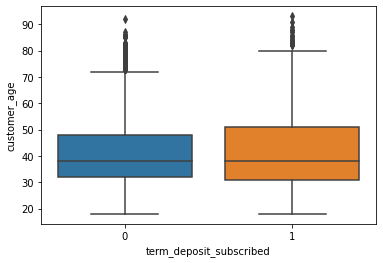

In [ ]:
#Plotting the Boxplot b/w Term Deposit Subscribed and customer age to see the relation b/w two variables
sns.boxplot(data = exl, x = 'term_deposit_subscribed',y = 'customer_age')

Median of ages of people who have subscribed and not subscribed is the same.
InterQuartile range is almost same.

In [ ]:
#calculating the null values in customer age
exl['customer_age'].isna().sum()

477

In [ ]:
exl['customer_age']

0        34.0
1        41.0
2        57.0
3        37.0
4        29.0
         ... 
23875    58.0
23876    51.0
23877    41.0
23878    48.0
23879    38.0
Name: customer_age, Length: 23880, dtype: float64

In [ ]:
#Filling the Customeer Age with their median Value
exl['customer_age'] = exl['customer_age'].fillna(exl['customer_age'].median())

In [ ]:
#Checking the NUll values in Job Type column
exl['job_type'].isna().sum()

0

In [ ]:
#Checking the NUll values in Marital column
exl['marital'].isna().sum()

107

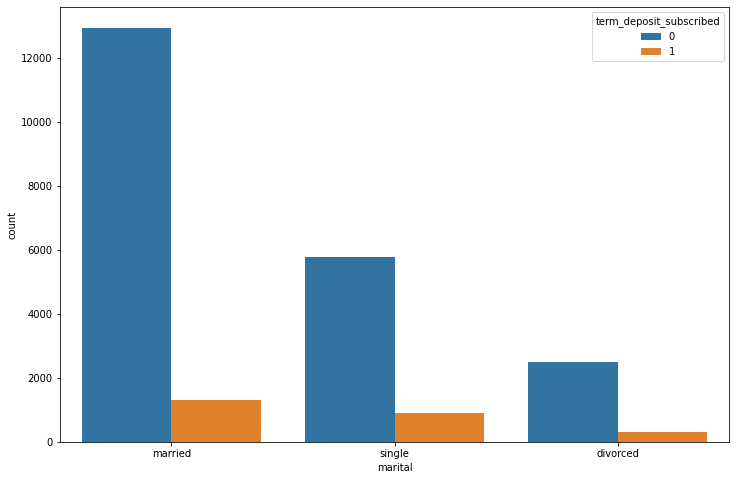

In [ ]:
#Now trying to find relation between Marital and Term Deposit Subscribed
plt.figure(figsize=(12,8))
ax = sns.countplot(x="marital",hue ='term_deposit_subscribed', data=exl)
plt.show()


We can see that Married people are most in subscribed and non-subscribed.
but if compare the ratios of each category in 
  married=8.34(approx)
  single marital=6(approx)
  divorced=5(approx)

In [ ]:
#Filling the Marital with their mode Value
exl['marital'] = exl['marital'].fillna(exl['marital'].mode().iloc[0])

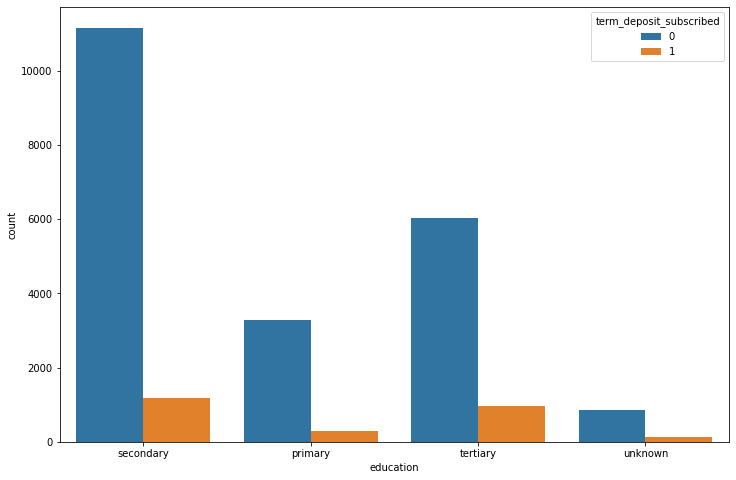

In [ ]:
#trying to find the relation between education and term deposit subscribed
plt.figure(figsize=(12,8))
ax = sns.countplot(x="education",hue ='term_deposit_subscribed', data=exl)
plt.show()


People with Secondary and Tertiary education are most who have subscribed.

In [ ]:
#Checking the NUll values in Education column
exl['education'].isna().sum()

0

In [ ]:
#Checking the NUll values in Default column
exl['default'].isna().sum()

0

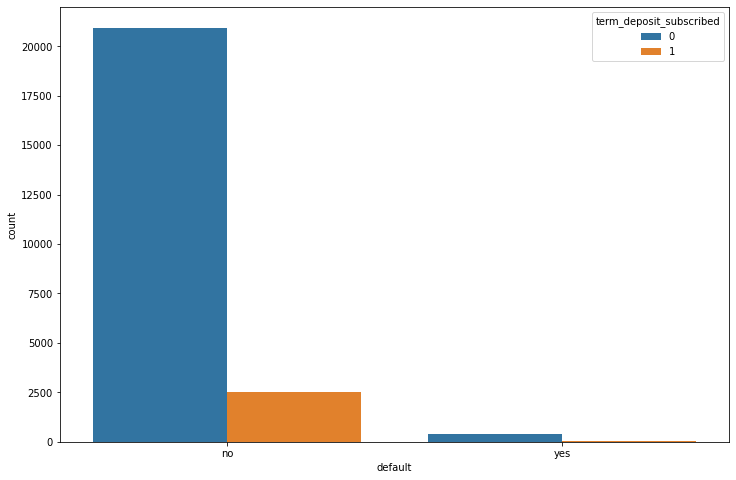

In [ ]:
#trying to find the relation between the default and term deposit subscribed
plt.figure(figsize=(12,8))
ax = sns.countplot(x="default",hue ='term_deposit_subscribed', data=exl)
plt.show()

As we can see non-default are most subscribed ones.

In [ ]:
#Checking the NUll values in Balance column
exl['balance'].isna().sum()

277

In [ ]:
#checking the maximum balance
exl.balance.max()

98419.0

In [ ]:
#Checking the minimum Balance
exl.balance.min()

-8020.0

In [ ]:
#Examining the Correlation b/w all the numerical variables
exl.corr()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
customer_age,1.000000,0.106435,-0.014385,-0.090637,0.007935,-0.004138,0.031907
balance,0.106435,1.000000,0.004370,-0.096978,-0.018266,0.011218,0.052946
day_of_month,-0.014385,0.004370,1.000000,-0.208932,0.164829,-0.044913,-0.024477
last_contact_duration,-0.090637,-0.096978,-0.208932,1.000000,-0.068436,0.037976,-0.019215
num_contacts_in_campaign,0.007935,-0.018266,0.164829,-0.068436,1.000000,-0.029736,-0.071203
num_contacts_prev_campaign,-0.004138,0.011218,-0.044913,0.037976,-0.029736,1.000000,0.084544
term_deposit_subscribed,0.031907,0.052946,-0.024477,-0.019215,-0.071203,0.084544,1.000000


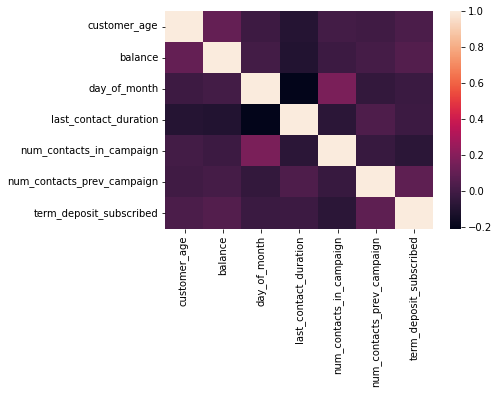

In [ ]:
#Heatmap
sns.heatmap(exl.corr());

In [ ]:
#Printing the basic statistic
print(exl.balance.mean(),exl.balance.median(),exl.balance.mode().iloc[0])

1363.9661060034741 443.0 3.0


We are getting mode=3, implies that people with balance 3 is most

In [ ]:
#Checking the number of people with balance 3 and have subscribed
a = exl.loc[(exl['balance']==3)&(exl['term_deposit_subscribed'] == 1)]
len(a.balance)

17

We are getting only 17 peoples.Therefore to maximise our classifier towards term subscription Filling null values with mean

In [ ]:
exl['balance'] = exl['balance'].fillna(exl['balance'].mean())

In [ ]:
#checking the null in remaining columns
exl.isna().sum()

customer_id                     0
customer_age                    0
job_type                        0
marital                         0
education                       0
default                         0
balance                         0
housing_loan                    0
personal_loan                 113
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

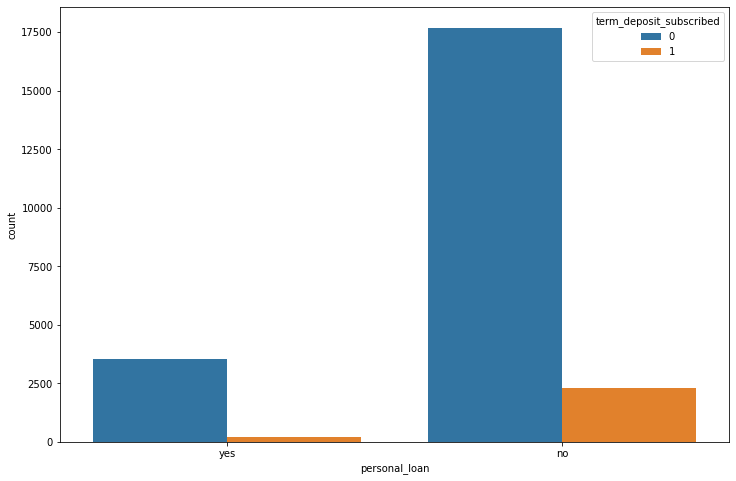

In [ ]:
#trying to find the relation b/w personal loan and term deposit susbscribe
plt.figure(figsize=(12,8))
ax = sns.countplot(x="personal_loan",hue ='term_deposit_subscribed', data=exl)
plt.show()

In [ ]:
#Filling the NUll values in Personal Loan column with mode
exl['personal_loan'] = exl['personal_loan'].fillna(exl['personal_loan'].mode().iloc[0])

In [ ]:
exl['personal_loan']

0        yes
1         no
2         no
3         no
4         no
        ... 
23875     no
23876     no
23877     no
23878     no
23879     no
Name: personal_loan, Length: 23880, dtype: object

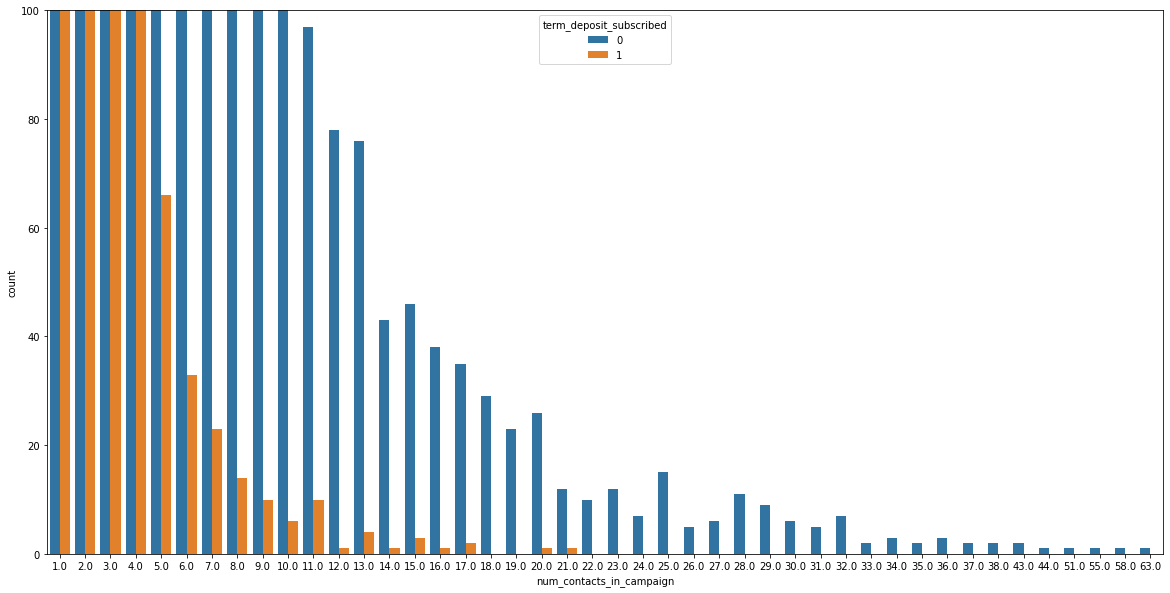

In [ ]:
#trying to find the relation b/w num_contacts_in_campaign and term deposit susbscribe
plt.figure(figsize=(20,10))
sns.countplot(data = exl, hue = 'term_deposit_subscribed',x = 'num_contacts_in_campaign')
plt.ylim(0,100);

In [ ]:
#Checking the number of people with num_contacts_in_campaign=5.0 and have subscribed
b = exl.loc[(exl['num_contacts_in_campaign']==5.0)&(exl['term_deposit_subscribed'] == 1)]
len(b.num_contacts_in_campaign)

66

In [ ]:
#Filling the column with mode value
exl['num_contacts_in_campaign'] = exl['num_contacts_in_campaign'].fillna(exl['num_contacts_in_campaign'].mode().iloc[0])

In [ ]:
exl['num_contacts_in_campaign'][103]

1.0

In [ ]:
exl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 23880 non-null  object 
 1   customer_age                23880 non-null  float64
 2   job_type                    23880 non-null  object 
 3   marital                     23880 non-null  object 
 4   education                   23880 non-null  object 
 5   default                     23880 non-null  object 
 6   balance                     23880 non-null  float64
 7   housing_loan                23880 non-null  object 
 8   personal_loan               23880 non-null  object 
 9   communication_type          23880 non-null  object 
 10  day_of_month                23880 non-null  int64  
 11  month                       23880 non-null  object 
 12  last_contact_duration       23880 non-null  int64  
 13  num_contacts_in_campaign    238

In [ ]:
exl['day_of_month']

0        18
1        13
2        18
3        26
4        19
         ..
23875     2
23876    20
23877    23
23878    11
23879    18
Name: day_of_month, Length: 23880, dtype: int64

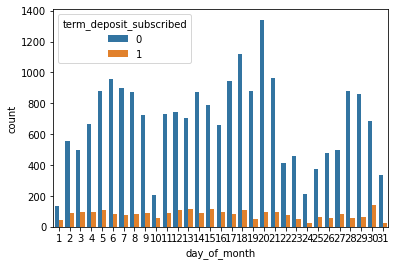

In [ ]:
#trying to find the relation b/w day_of_month and term deposit susbscribe
#plt.figure(figsize=(20,10))
sns.countplot(data = exl, hue = 'term_deposit_subscribed',x = 'day_of_month');
#plt.ylim(0,100);

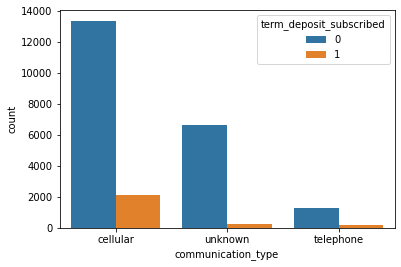

In [ ]:
#trying to find the relation b/w communication type and term deposit susbscribe
#plt.figure(figsize=(20,10))
sns.countplot(data = exl, hue = 'term_deposit_subscribed',x = 'communication_type');


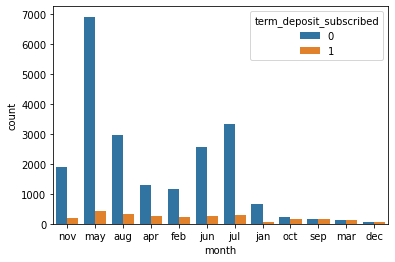

In [ ]:
#trying to find the relation b/w month and term deposit susbscribe
sns.countplot(data = exl, hue = 'term_deposit_subscribed',x = 'month');

In [ ]:
# month = exl['month']
# month = pd.get_dummies(month,drop_first = True)
# month.head()

In [ ]:
# exl = pd.concat([exl,month],axis = 1)
# exl.head()

In [ ]:
#exl.drop(['month'],axis = 1,inplace = True)

In [ ]:
#exl.info()

In [ ]:
#converting the month colum to datetime
exl['month'] = pd.to_datetime(exl.month,format = '%b').dt.month

In [ ]:
exl['month']

0        11
1         5
2         8
3         5
4         8
         ..
23875     2
23876     6
23877     5
23878     8
23879     8
Name: month, Length: 23880, dtype: int64

In [ ]:
#exl['month'] = pd.to_datetime(exl['month'], format ='%m')

In [ ]:
dictionary

,column,description
0,customer_id,unique identifier for each customer (primary key)
1,customer_age,age of the customer
2,job_type,type of job
3,marital,marital status
4,education,highest educational qualification
5,default,delinquency status
6,balance,current account balance
7,housing_loan,flag indicating customers with home loan
8,personal_loan,flag indicating customers with personal loan
9,communication_type,mode of communication of the previous campaign


In [ ]:
exl.dtypes

customer_id                    object
customer_age                  float64
job_type                       object
marital                        object
education                      object
default                        object
balance                       float64
housing_loan                   object
personal_loan                  object
communication_type             object
day_of_month                    int64
month                           int64
last_contact_duration           int64
num_contacts_in_campaign      float64
num_contacts_prev_campaign      int64
prev_campaign_outcome          object
term_deposit_subscribed         int64
dtype: object

In [ ]:
#Using Categorical Coding with object columns but not customer id

for cols in exl.columns:
  if exl[cols].dtype == 'O' and cols != "customer_id":
    exl[cols] = exl[cols].astype('category')
    exl[cols] = exl[cols].cat.codes

# exl["marital"]= exl["marital"].astype('category')
# exl["marital_cat"] = exl["marital"].cat.codes
# exl["education"]= exl["education"].astype('category')
# exl["education_cat"] = exl["education"].cat.codes
# exl["default"]= exl["default"].astype('category')
# exl["default_cat"] = exl["default"].cat.codes
# exl.head()


In [ ]:
#checking the data types of columns
exl.dtypes

customer_id                    object
customer_age                  float64
job_type                         int8
marital                          int8
education                        int8
default                          int8
balance                       float64
housing_loan                     int8
personal_loan                    int8
communication_type               int8
day_of_month                    int64
month                           int64
last_contact_duration           int64
num_contacts_in_campaign      float64
num_contacts_prev_campaign      int64
prev_campaign_outcome            int8
term_deposit_subscribed         int64
dtype: object

In [ ]:
exl.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,1,1,1,0,934.0,0,1,0,18,11,704,2.0,1,1,0
1,id_40992,41.0,1,1,0,0,1352.0,1,0,0,13,5,893,2.0,0,3,0
2,id_41178,57.0,1,1,0,0,495.0,0,0,0,18,8,796,4.0,0,3,1
3,id_35102,37.0,4,1,2,0,650.0,1,0,2,26,5,880,1.0,0,3,0
4,id_34750,29.0,9,1,1,0,265.0,1,0,0,19,8,795,2.0,0,3,0


In [ ]:
exl.columns

Index(['customer_id', 'customer_age', 'job_type', 'marital', 'education',
       'default', 'balance', 'housing_loan', 'personal_loan',
       'communication_type', 'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome', 'term_deposit_subscribed'],
      dtype='object')

In [ ]:
#Definig the Dependent and Independent Variables
X = exl.loc[:,['customer_age', 'job_type', 'marital', 'education',
       'default', 'balance', 'housing_loan', 'personal_loan',
       'communication_type', 'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome']]
Y = exl.loc[:,['term_deposit_subscribed']]



In [ ]:
#Normalize the independent variable columnns 
X=(X-X.mean())/X.std()
X.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,-0.595940,-1.020453,-0.268923,-0.302781,-0.13509,-0.143226,-1.127764,2.311000,-0.712288,0.264830,2.018526,-2.024208,-0.244360,0.158571,-1.573166
1,0.061314,-1.020453,-0.268923,-1.643235,-0.13509,-0.003986,0.886673,-0.432695,-0.712288,-0.336050,-0.474766,0.511424,-0.244360,-0.222459,0.445165
2,1.563608,-1.020453,-0.268923,-1.643235,-0.13509,-0.289461,-1.127764,-0.432695,-0.712288,0.264830,0.771880,-0.789932,0.391815,-0.222459,0.445165
3,-0.314260,-0.102345,-0.268923,1.037673,-0.13509,-0.237829,0.886673,-0.432695,1.513205,1.226237,-0.474766,0.337016,-0.562447,-0.222459,0.445165
4,-1.065407,1.427835,-0.268923,-0.302781,-0.13509,-0.366076,0.886673,-0.432695,-0.712288,0.385006,0.771880,-0.803348,-0.244360,-0.222459,0.445165


In [ ]:
Y.head()

,term_deposit_subscribed
0,0
1,0
2,1
3,0
4,0


In [ ]:
#Import important packages from scikit learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,Perceptron,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score,precision_score

In [ ]:
#Splitting the data into train/test data
x_train,x_test,y_train,y_test = train_test_split(X,Y, train_size =0.8,test_size = 0.2,random_state = 6)

In [ ]:
#print the shapes
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(19104, 15) (4776, 15) (19104, 1) (4776, 1)


In [ ]:
#Defining the Pipeline to choose algorithm
pipelines={
    'rfc':make_pipeline(RandomForestClassifier(random_state=42)),
    'rc':make_pipeline(RidgeClassifier(random_state=42)),
    'knn':make_pipeline(KNeighborsClassifier())
}
hypergrid={
    'rfc':{
        'randomforestclassifier__n_estimators':[100,500],
        'randomforestclassifier__criterion':['entropy']
    },
    'rc':{
        'ridgeclassifier__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
    },
    'knn':{
        'kneighborsclassifier__n_neighbors':[50,75]
    }
}

In [ ]:
#Fitting the models
fit_models={}
for algo,pipeline in pipelines.items():
    model=GridSearchCV(pipeline,hypergrid[algo],cv=10,n_jobs=2)
    try:
        print("Starting training for {}.".format(algo))
        model.fit(x_train,y_train)
        fit_models[algo]=model
        print("{} has been successfully fit.".format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for rfc.


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


rfc has been successfully fit.
Starting training for rc.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rc has been successfully fit.
Starting training for knn.
knn has been successfully fit.


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#Checking the metrics 
for algo,model in fit_models.items():
    print(algo+"\n")
    yhat=model.predict(x_test)
    r2=r2_score(y_test,yhat)
    mae=mean_absolute_error(y_test, yhat)
    mse=mean_squared_error(y_test,yhat)
    rmse=np.sqrt(mean_squared_error(y_test, yhat))
    print("{} scores - R2:{}   MAE:{}   MSE:{}   RMSE:{}".format(algo,r2,mae,mse,rmse))
    print("accuracy:= {} ".format(accuracy_score(y_test, yhat)))
    print("score-train= {} score-test= {}".format(model.score(x_train,y_train),model.score(x_test,y_test)))
    print("Precision Score= {}".format(precision_score(y_test, yhat)))
    print("-------------------------------------------------------------------------------\n-----------------------------------------------")


rfc

rfc scores - R2:0.007014932200077428   MAE:0.0942211055276382   MSE:0.0942211055276382   RMSE:0.3069545659012718
accuracy:= 0.9057788944723618 
score-train= 1.0 score-test= 0.9057788944723618
Precision Score= 0.6492146596858639
-------------------------------------------------------------------------------
-----------------------------------------------
rc

rc scores - R2:-0.11876317638791267   MAE:0.10615577889447236   MSE:0.10615577889447236   RMSE:0.3258155596261056
accuracy:= 0.8938442211055276 
score-train= 0.8937395309882747 score-test= 0.8938442211055276
Precision Score= 0.0
-------------------------------------------------------------------------------
-----------------------------------------------
knn



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


knn scores - R2:-0.07904377367591575   MAE:0.10238693467336683   MSE:0.10238693467336683   RMSE:0.31997958477591476
accuracy:= 0.8976130653266332 
score-train= 0.8956239530988275 score-test= 0.8976130653266332
Precision Score= 0.8
-------------------------------------------------------------------------------
-----------------------------------------------


In [ ]:
best_model=fit_models['knn']

In [ ]:
new_customer=pd.read_excel("New_customer_list_data.xlsx")

In [ ]:
new_customer.head()
new_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7767 entries, 0 to 7766
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7767 non-null   object 
 1   customer_age                7625 non-null   float64
 2   job_type                    7767 non-null   object 
 3   marital                     7724 non-null   object 
 4   education                   7767 non-null   object 
 5   default                     7767 non-null   object 
 6   balance                     7645 non-null   float64
 7   housing_loan                7767 non-null   object 
 8   personal_loan               7731 non-null   object 
 9   communication_type          7767 non-null   object 
 10  last_contact_duration       7767 non-null   int64  
 11  day_of_month                7767 non-null   int64  
 12  month                       7767 non-null   object 
 13  num_contacts_in_campaign    7751 

In [ ]:
new_customer.isna().sum()

customer_id                     0
customer_age                  142
job_type                        0
marital                        43
education                       0
default                         0
balance                       122
housing_loan                    0
personal_loan                  36
communication_type              0
last_contact_duration           0
day_of_month                    0
month                           0
num_contacts_in_campaign       16
num_contacts_prev_campaign      0
prev_campaign_outcome           0
dtype: int64

In [ ]:
new_customer['customer_age'] = new_customer['customer_age'].fillna(new_customer['customer_age'].median())
new_customer['marital'] = new_customer['marital'].fillna(new_customer['marital'].mode().iloc[0])
new_customer['personal_loan'] = new_customer['personal_loan'].fillna(new_customer['personal_loan'].mode().iloc[0])
new_customer['balance'] = new_customer['balance'].fillna(new_customer['balance'].mean())
new_customer['num_contacts_in_campaign'] = new_customer['num_contacts_in_campaign'].fillna(new_customer['num_contacts_in_campaign'].mode().iloc[0])

In [ ]:
for cols in new_customer.columns:
  if new_customer[cols].dtype == 'O' and cols != "customer_id":
    new_customer[cols] = new_customer[cols].astype('category')
    new_customer[cols] = new_customer[cols].cat.codes


In [ ]:
new_customer.dtypes

customer_id                    object
customer_age                  float64
job_type                         int8
marital                          int8
education                        int8
default                          int8
balance                       float64
housing_loan                     int8
personal_loan                    int8
communication_type               int8
last_contact_duration           int64
day_of_month                    int64
month                            int8
num_contacts_in_campaign      float64
num_contacts_prev_campaign      int64
prev_campaign_outcome            int8
dtype: object

In [ ]:
new_customer.columns

Index(['customer_id', 'customer_age', 'job_type', 'marital', 'education',
       'default', 'balance', 'housing_loan', 'personal_loan',
       'communication_type', 'last_contact_duration', 'day_of_month', 'month',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome'],
      dtype='object')

In [ ]:
x_new = new_customer.loc[:,['customer_age', 'job_type', 'marital', 'education',
       'default', 'balance', 'housing_loan', 'personal_loan',
       'communication_type', 'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome']]

x_new=(x_new-x_new.mean())/x_new.std()
x_new.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,-1.178172,-0.088234,1.385351,1.035373,-0.127886,-0.336752,0.890645,-0.441889,1.502432,1.214230,0.160391,-0.072593,0.386198,-0.29746,0.450911
1,0.512085,1.452494,-0.265719,-0.295380,-0.127886,-0.222751,-1.122638,-0.441889,-0.719885,-1.307151,-0.834092,1.816761,0.386198,-0.29746,0.450911
2,-0.614753,0.836203,1.385351,-0.295380,-0.127886,-0.423712,0.890645,-0.441889,1.502432,0.493836,0.823379,0.423195,0.070451,-0.29746,0.450911
3,2.296244,0.219911,-0.265719,-1.626133,-0.127886,0.460638,-1.122638,-0.441889,-0.719885,0.854033,-1.828574,0.784986,-0.561045,-0.29746,0.450911
4,1.075503,-1.012671,-0.265719,1.035373,-0.127886,0.122324,-1.122638,-0.441889,-0.719885,0.373770,1.154873,-2.028945,0.070451,0.18578,-2.554431


In [ ]:
max=0
y_df=[]
for i in range(1,5):
  newModel=RandomForestClassifier(n_estimators=18,criterion="entropy",min_samples_split=5,max_features="sqrt")
  newModel.fit(x_train,y_train)
  yhat=newModel.predict(x_test)
  y=newModel.predict(x_new)
  yd=pd.DataFrame(y)
  print(yd.value_counts())
  print("Precision:-{}".format(precision_score(y_test,yhat)))
  if max<yd.value_counts()[1]:
    max=yd.value_counts()[1]
    y_df=y
  print("----------------------------------------------------")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0    7443
1     324
dtype: int64
Precision:-0.6287128712871287
----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0    7382
1     385
dtype: int64
Precision:-0.6069651741293532
----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0    7404
1     363
dtype: int64
Precision:-0.6067961165048543
----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0    7452
1     315
dtype: int64
Precision:-0.6842105263157895
----------------------------------------------------


In [ ]:
y=pd.DataFrame(y_df)
y.value_counts()


0    7382
1     385
dtype: int64

In [ ]:
y.columns=["term_deposit_subs"]
y.head()

,term_deposit_subs
0,0
1,0
2,0
3,0
4,0


In [ ]:
ans=pd.concat([new_customer["customer_id"],y["term_deposit_subs"]],axis=1)
ans.head()

,customer_id,term_deposit_subs
0,id_43823,0
1,id_10523,0
2,id_43951,0
3,id_12681,0
4,id_2153,0


In [ ]:
final=ans[ans["term_deposit_subs"]==1]
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 9 to 7702
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        385 non-null    object
 1   term_deposit_subs  385 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.0+ KB


In [ ]:
probmodel=LogisticRegression()
probmodel.fit(x_train,y_train)
yhat=probmodel.predict(x_test)
y=probmodel.predict(x_new)
y=pd.DataFrame(y)
y.value_counts()




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0    7736
1      31
dtype: int64

In [ ]:
pred=newModel.predict_proba(x_new)
pred=pd.DataFrame(pred)
pred.head()

,0,1
0,0.860185,0.139815
1,0.835185,0.164815
2,0.946759,0.053241
3,0.673677,0.326323
4,0.941358,0.058642


In [ ]:

pred.columns=["0_prob","1_prob"]

In [ ]:
ans=pd.concat([ans,pred],axis=1)
  

In [ ]:
ans.head()

,customer_id,term_deposit_subs,0_prob,1_prob
0,id_43823,0,0.860185,0.139815
1,id_10523,0,0.835185,0.164815
2,id_43951,0,0.946759,0.053241
3,id_12681,0,0.673677,0.326323
4,id_2153,0,0.941358,0.058642


In [ ]:
final=ans[ans["1_prob"]>0.3222]
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 3 to 7753
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        1007 non-null   object 
 1   term_deposit_subs  1007 non-null   int64  
 2   0_prob             1007 non-null   float64
 3   1_prob             1007 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 39.3+ KB


In [ ]:
final.head()
final["term_deposit_subs"].value_counts()

0    669
1    338
Name: term_deposit_subs, dtype: int64

In [ ]:
final_0=final[final["term_deposit_subs"]==0]
final_1=final[final["term_deposit_subs"]==1]
  

In [ ]:
final_0=final_0.iloc[7:,:]

In [ ]:
final_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 64 to 7753
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        662 non-null    object 
 1   term_deposit_subs  662 non-null    int64  
 2   0_prob             662 non-null    float64
 3   1_prob             662 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 25.9+ KB


In [ ]:
final=pd.concat([final_1,final_0])

In [ ]:
final

,customer_id,term_deposit_subs,0_prob,1_prob
50,id_42906,1,0.479012,0.520988
57,id_14411,1,0.623545,0.376455
65,id_27572,1,0.537963,0.462037
86,id_1895,1,0.342593,0.657407
92,id_33092,1,0.511111,0.488889
...,...,...,...,...
7730,id_37851,0,0.461640,0.538360
7732,id_35433,0,0.405556,0.594444
7746,id_38913,0,0.575926,0.424074
7751,id_39390,0,0.428241,0.571759


In [ ]:
final=pd.DataFrame(final)
final=final.drop(columns=['term_deposit_subs','0_prob','1_prob'],axis=1)


In [ ]:
final

,customer_id
50,id_42906
57,id_14411
65,id_27572
86,id_1895
92,id_33092
...,...
7730,id_37851
7732,id_35433
7746,id_38913
7751,id_39390
